# COURSE: A deep understanding of deep learning
## SECTION: Overfitting, cross-validation, regularization
### LECTURE: Cross-validation on regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401
##### Modified from original code

In [1]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Create the data and the model

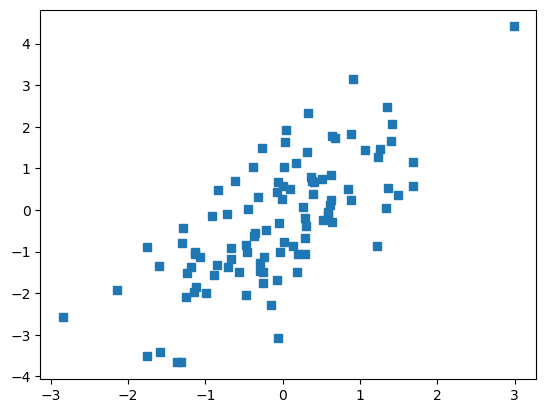

In [2]:
N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)

# and plot
plt.plot(x,y,'s')
plt.show()

In [3]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

In [4]:
# model meta-parameters

learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

# Select data for training

In [5]:
# select training data
trainidx  = np.random.choice(range(N), size=int(N*0.8),replace=False) # random indices with 80% proportion
trainBool = np.zeros(N,dtype=bool) # initialize vector of Falses'
trainBool[trainidx] = True # set selected samples to True

# show the sizes
print(x[trainBool].shape)
print(x[~trainBool].shape)

torch.Size([80, 1])
torch.Size([20, 1])


# Train the model

In [6]:
numepochs = 500
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(x[trainBool])

  # compute loss
  loss = lossfun(yHat,y[trainBool])

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [7]:
### test the losses

# compute losses of the TEST set
predYtest = ANNreg(x[~trainBool])
testloss = (predYtest-y[~trainBool]).pow(2).mean() 
# testloss = lossfun(predYtest,y[~trainBool]) # also works

# print out final TRAIN loss and TEST loss
print(f'Final TRAIN loss: {loss.detach():.2f}')
print(f'Final TEST loss: {testloss.detach():.2f}')

Final TRAIN loss: 1.07
Final TEST loss: 0.96


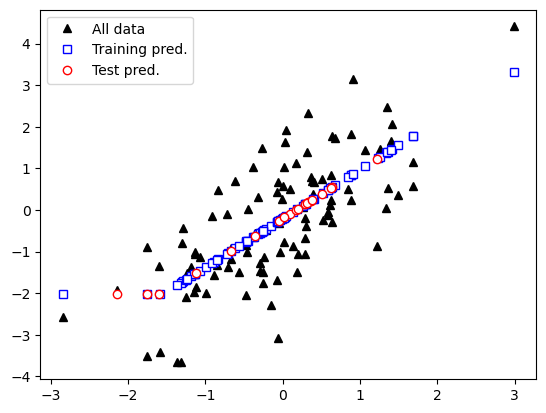

In [11]:
### plot the data

# predictions for final training run
predYtrain = ANNreg(x[trainBool]).detach().numpy()

# now plot
plt.plot(x,y,'k^',label='All data')
plt.plot(x[trainBool], predYtrain,
         'bs',markerfacecolor='w',label='Training pred.')
plt.plot(x[~trainBool],predYtest.detach(),
         'ro',markerfacecolor='w',label='Test pred.')
plt.legend()
plt.show()

# model has high variability: sometimes did a good fit, sometimes did terrible

# Additional explorations

In [9]:
# 1) The train/test split is currently hard-coded to be 80/20 (note the number "80"). This is bad coding style, because
#    if you change the number of datapoints from N=100 to N=10000, then we're still only training on 80 samples and testing
#    on 10000-80=9920 samples. Change how the variable trainBool is created so that it always trains on 80% of the data,
#    regardless of the dataset size.
# 
# 2) Re-write this code to use scikitlearn and/or DataLoader instead of manually separating the data into train/test.
# 
# 3) Do we really need 500 epochs to train the model? To find out, add code to the training loop to compute the MSEloss 
#    for the train and test data on each iteration during training. Then plot the train and test error as a function of
#    training epoch. What is your evaluation of an appropriate amount of training for this model/dataset?
# 